In [1]:
import os
import copy
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from IPython.display import Image
cwd =  os.getcwd().replace("notebooks/research/impermanent_loss","")
os.chdir(cwd)

from python.dev.cpt import SolveDeltas
from python.dev.math.model import BrownianModel
from python.dev.cpt import Liquidity
from python.dev.math.model import EventSelectionModel
from python.dev.math.model import TokenDeltaModel

In [2]:
N_RUNS = 1825

b = BrownianModel(0.2)
p_arr = b.gen_gbm(0.1, 1, N_RUNS, 1)

In [3]:
liq = Liquidity(10000, 2000, 'SYS','DIA')
sDel = SolveDeltas(liq)

tdel_model = TokenDeltaModel()

sys_arr = np.array([liq.get_x_real()])
dai_arr = np.array([liq.get_y_real()])
dsys_arr = np.array([])
ddai_arr = np.array([])

for p in p_arr[1:]:
    
    swap_dx, swap_dy = sDel.apply(p)
    sDel.apply(p) 
    dx = tdel_model.delta(0.7)
    dy = tdel_model.delta(0.55)
    sDel.add_dx(dx)    
    sDel.add_dy(dy) 
    
    sys_arr = np.append(sys_arr, liq.get_x_real())
    dai_arr = np.append(dai_arr, liq.get_y_real())
    dsys_arr = np.append(dsys_arr, swap_dx)
    ddai_arr = np.append(ddai_arr, swap_dy)      
    

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


In [4]:
N = 1000

p_calc_arr = abs(ddai_arr/dsys_arr)
liq_arr = np.sqrt(dai_arr*sys_arr)

raw_price = p_arr[N]
yx_price = dai_arr[N]/sys_arr[N]
dydx_price = p_calc_arr[N-1]
print('raw: {:.7f} y/x: {:.7f} dy/dx: {:.7f} liq: {:.7f}'.format(raw_price, yx_price, dydx_price, liq_arr[N]))


raw: 0.1161835 y/x: 0.1151698 dy/dx: 0.1161835 liq: 9069.7801926


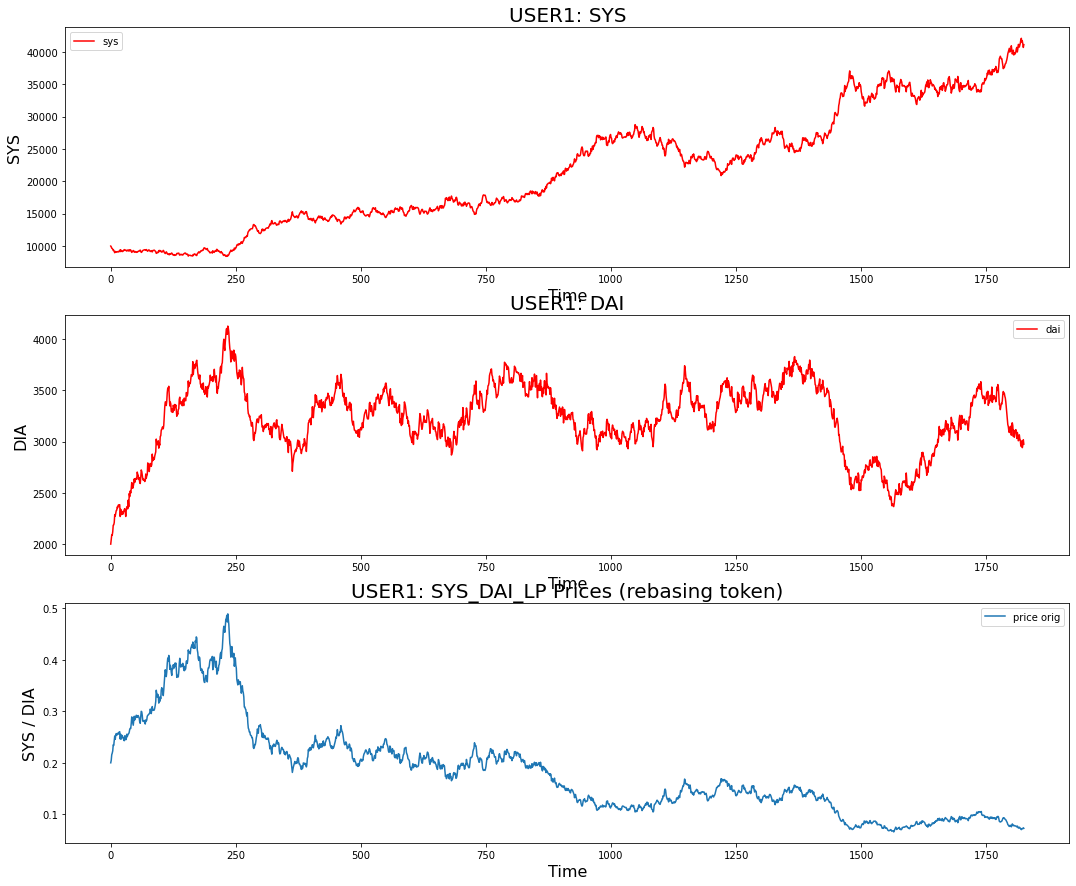

In [5]:
fig, (SYS_ax, DAI_ax, price_ax) = plt.subplots(nrows=3, sharex=False, sharey=False, figsize=(18, 15))
SYS_ax.plot(sys_arr, color = 'r',label='sys') 
SYS_ax.set_title("USER1: SYS", fontsize=20)
SYS_ax.set_ylabel("SYS", fontsize=16)
SYS_ax.set_xlabel('Time', fontsize=16)
SYS_ax.legend()

DAI_ax.plot(dai_arr, color = 'r', label='dai') 
DAI_ax.set_title("USER1: DAI", fontsize=20)
DAI_ax.set_ylabel("DIA", fontsize=16)
DAI_ax.set_xlabel('Time', fontsize=16)
DAI_ax.legend()

price_ax.plot(p_arr, label='price orig') 
price_ax.set_title("USER1: SYS_DAI_LP Prices (rebasing token)", fontsize=20)
price_ax.set_ylabel("SYS / DIA", fontsize=16)
price_ax.set_xlabel('Time', fontsize=16)
price_ax.legend()